### Anomaly Detection

Students: **Чича Олександр та Мельничук Павло**

Mentor: **Anna Mandrenko, Yevhenii Kubiuk**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [2]:
path = "ambient_temperature_system_failure.csv"
data_frame = pd.read_csv(path)
data_frame

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


In [3]:
data_frame.describe()

,value
count,7267.000000
mean,71.242433
std,4.247509
min,57.458406
25%,68.369411
50%,71.858493
75%,74.430958
max,86.223213


<AxesSubplot:xlabel='timestamp'>

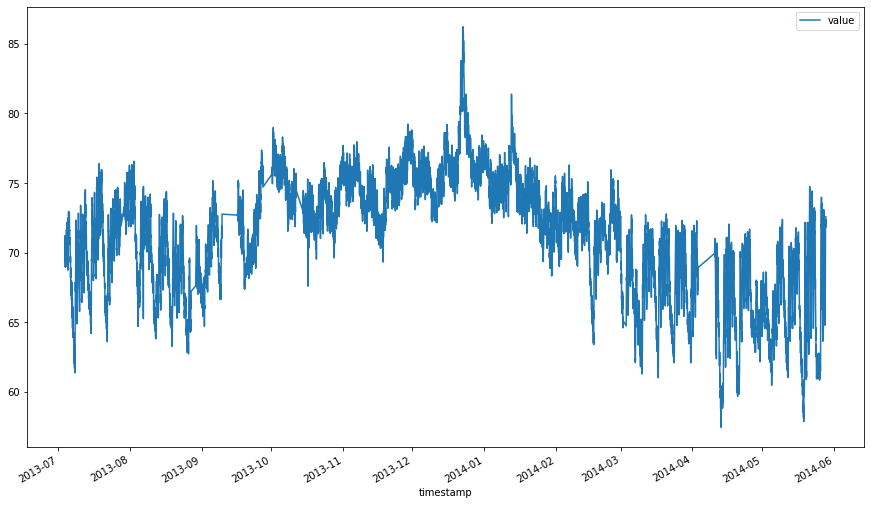

In [4]:
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'])
data_frame.plot(x='timestamp', figsize=(15, 9))

<AxesSubplot:>

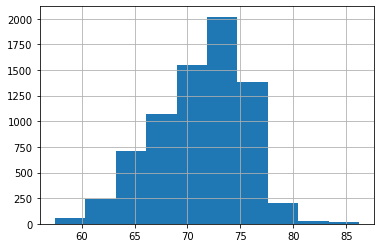

In [5]:
data_frame['value'].hist()

In [6]:
data_frame['hour'] = data_frame['timestamp'].dt.hour

daylight_list = []
for i in data_frame['hour']:
    if i>=0 and i<12:
        daylight_list.append(0)
    else :
        daylight_list.append(1)
data_frame["daylight"] = daylight_list

data_frame["day of week"] = data_frame['timestamp'].dt.weekday

data_frame["is weekend"] = data_frame["day of week"]>4

data_frame["day of the year"] = data_frame['timestamp'].dt.dayofyear

data_frame["year"] = data_frame['timestamp'].dt.year

data_frame

,timestamp,value,hour,daylight,day of week,is weekend,day of the year,year
0,2013-07-04 00:00:00,69.880835,0,0,3,False,185,2013
1,2013-07-04 01:00:00,71.220227,1,0,3,False,185,2013
2,2013-07-04 02:00:00,70.877805,2,0,3,False,185,2013
3,2013-07-04 03:00:00,68.959400,3,0,3,False,185,2013
4,2013-07-04 04:00:00,69.283551,4,0,3,False,185,2013
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,0,2,False,148,2014
7263,2014-05-28 12:00:00,72.172956,12,1,2,False,148,2014
7264,2014-05-28 13:00:00,72.046565,13,1,2,False,148,2014
7265,2014-05-28 14:00:00,71.825226,14,1,2,False,148,2014


In [7]:
data_frame.nunique()

timestamp          7267
value              7267
hour                 24
daylight              2
day of week           7
is weekend            2
day of the year     311
year                  2
dtype: int64

In [8]:
print('missing values:\n',data_frame.isnull().sum())

missing values:
 timestamp          0
value              0
hour               0
daylight           0
day of week        0
is weekend         0
day of the year    0
year               0
dtype: int64


<AxesSubplot:title={'center':'value'}, xlabel='is weekend'>

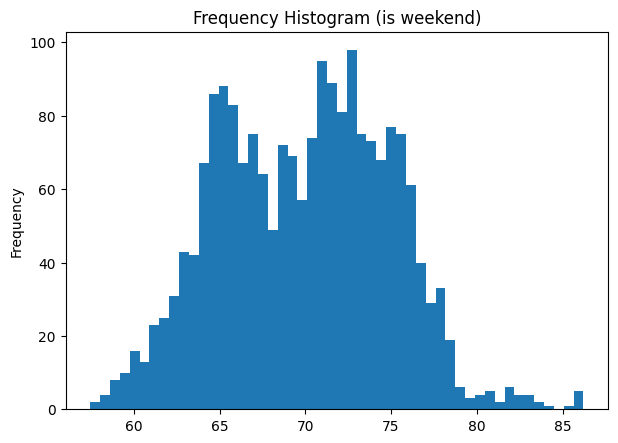

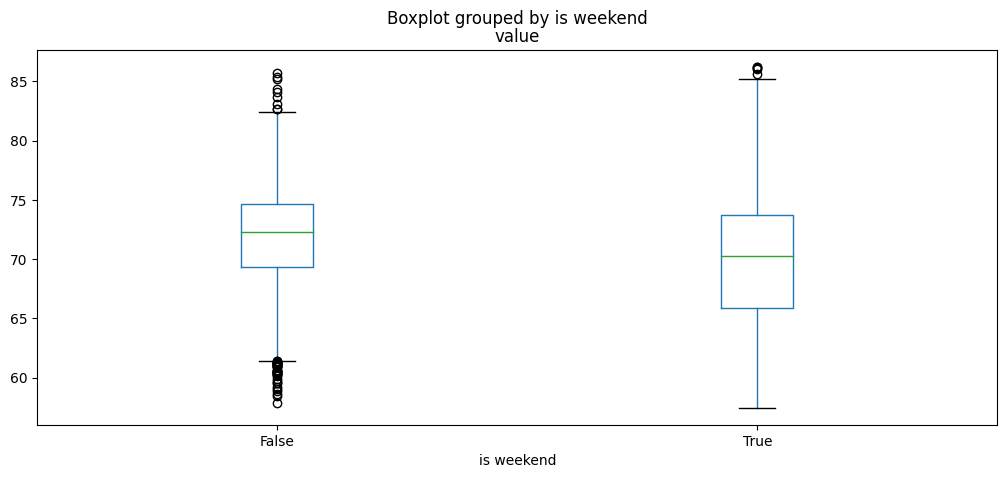

In [9]:
plt.rcParams.update({"figure.figsize":(7,5), "figure.dpi":100})

plt.hist(data_frame.loc[data_frame["is weekend"] == True]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram (is weekend)", ylabel="Frequency")

data_frame.boxplot(by='is weekend', column=['value'], grid=False, figsize=(12,5))

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

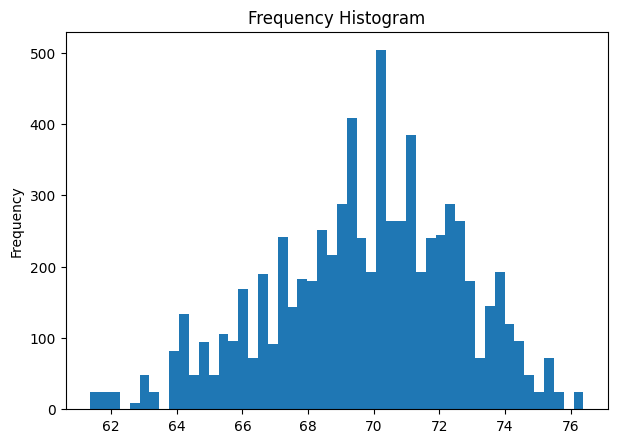

In [10]:
plt.hist(data_frame.loc[data_frame["day of the year"]]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram", ylabel="Frequency")

<AxesSubplot:title={'center':'value'}, xlabel='day of week'>

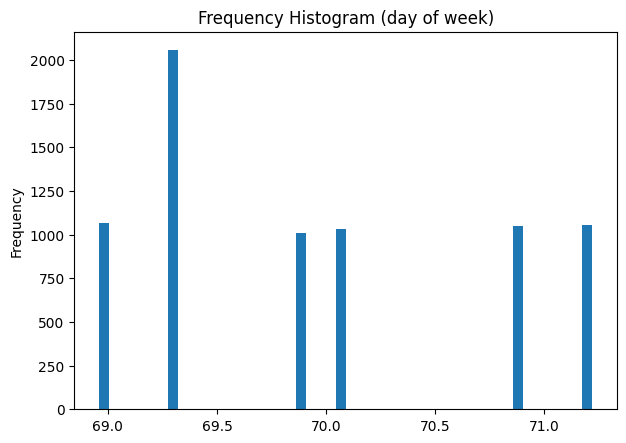

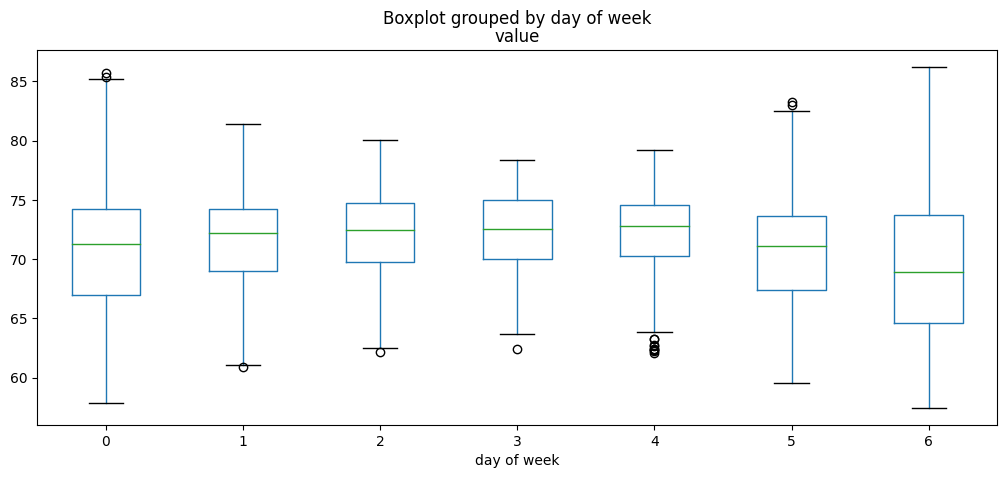

In [11]:
plt.hist(data_frame.loc[data_frame["day of week"]]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram (day of week)", ylabel="Frequency")

data_frame.boxplot(by='day of week', column=['value'], grid=False, figsize=(12,5))

<AxesSubplot:title={'center':'value'}, xlabel='daylight'>

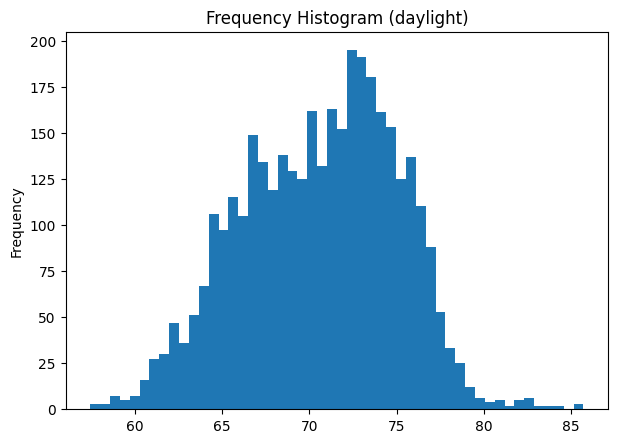

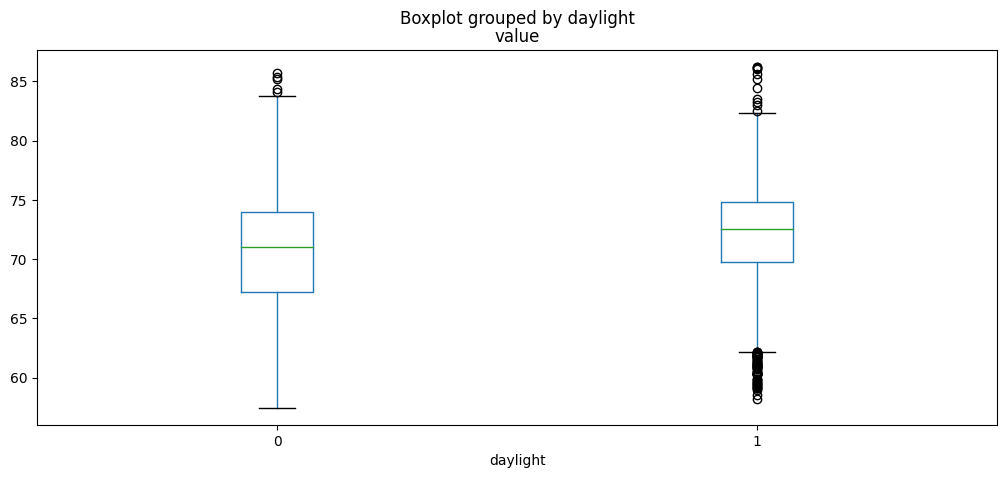

In [12]:
plt.hist(data_frame.loc[data_frame["daylight"] == 0]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram (daylight)", ylabel="Frequency")

data_frame.boxplot(by='daylight', column=['value'], grid=False, figsize=(12,5))

<AxesSubplot:title={'center':'value'}, xlabel='hour'>

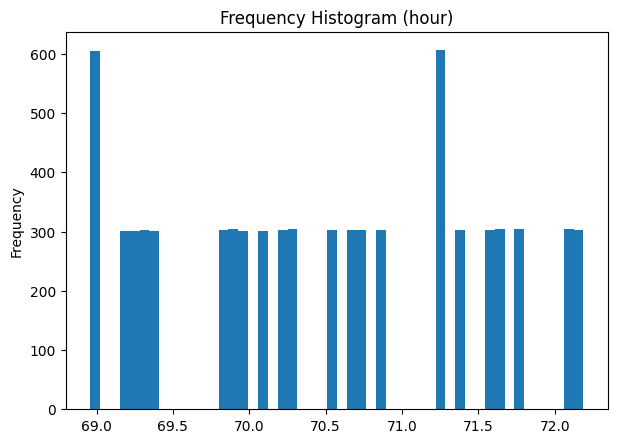

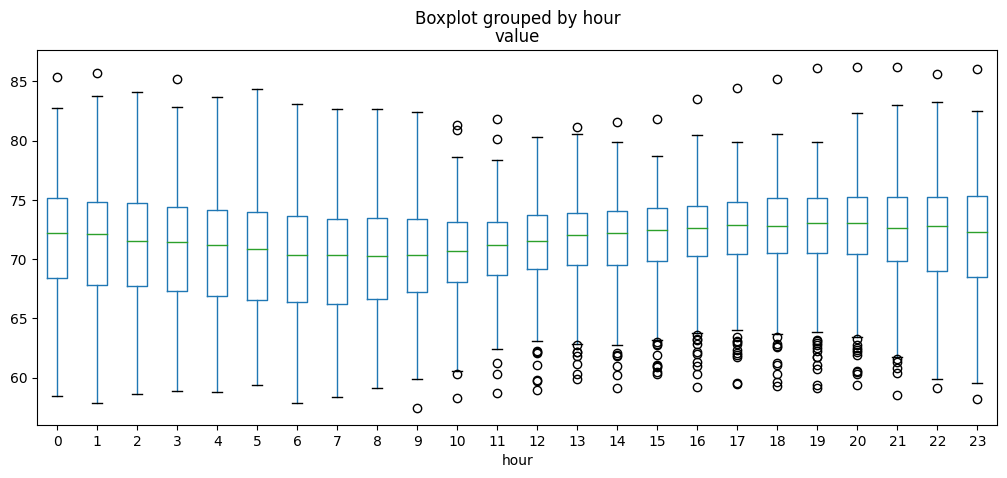

In [13]:
plt.hist(data_frame.loc[data_frame["hour"]]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram (hour)", ylabel="Frequency")

data_frame.boxplot(by='hour', column=['value'], grid=False, figsize=(12,5))

<AxesSubplot:title={'center':'value'}, xlabel='year'>

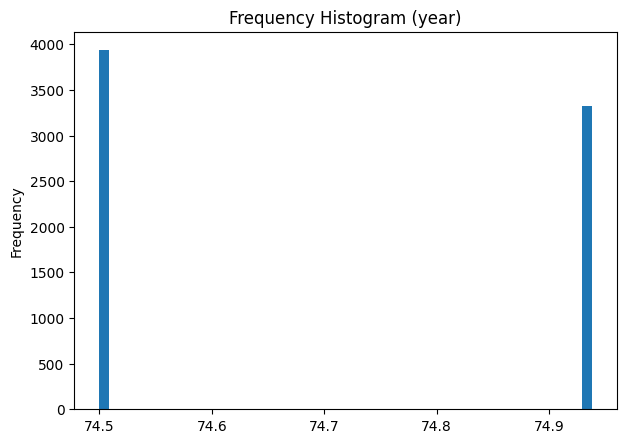

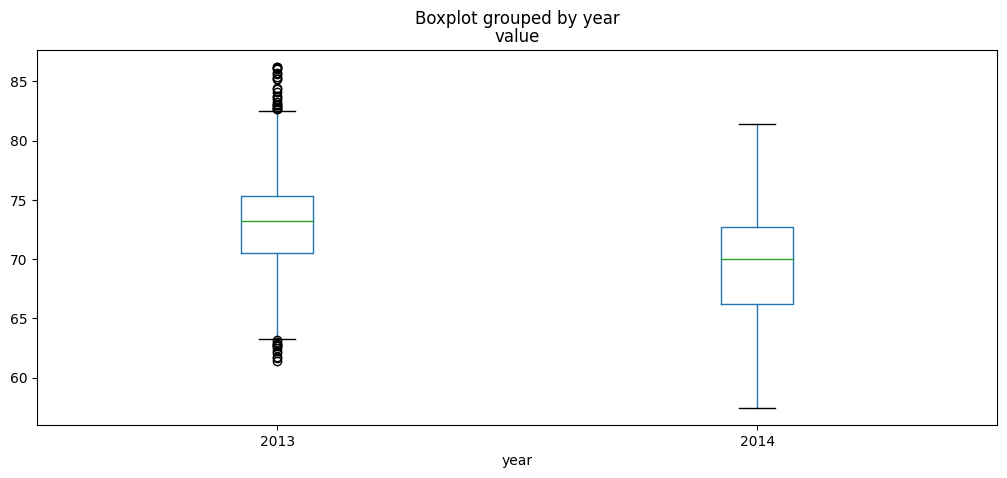

In [15]:
plt.hist(data_frame.loc[data_frame["year"]]["value"], bins=50)
plt.gca().set(title = "Frequency Histogram (year)", ylabel="Frequency")

data_frame.boxplot(by='year', column=['value'], grid=False, figsize=(12,5))

In [14]:
from sklearn.model_selection import train_test_split

tr_data_frame, tst_data_frame = train_test_split(data_frame)

In [15]:
tr_data_frame

,timestamp,value,hour,daylight,day of week,is weekend,day of the year,year
965,2013-08-14 13:00:00,71.154676,13,1,2,False,226,2013
4129,2014-01-08 20:00:00,75.111465,20,1,2,False,8,2014
1735,2013-09-24 05:00:00,70.040735,5,0,1,False,267,2013
3355,2013-12-07 14:00:00,74.522779,14,1,5,True,341,2013
2677,2013-11-09 08:00:00,72.955505,8,0,5,True,313,2013
...,...,...,...,...,...,...,...,...
5858,2014-03-23 04:00:00,63.463436,4,0,6,True,82,2014
6010,2014-03-30 02:00:00,65.381096,2,0,6,True,89,2014
5877,2014-03-23 23:00:00,63.055471,23,1,6,True,82,2014
1793,2013-09-26 15:00:00,75.066548,15,1,3,False,269,2013


In [16]:
tst_data_frame

,timestamp,value,hour,daylight,day of week,is weekend,day of the year,year
3750,2013-12-24 01:00:00,80.399143,1,0,1,False,358,2013
4185,2014-01-11 04:00:00,75.813481,4,0,5,True,11,2014
3614,2013-12-18 09:00:00,76.622652,9,0,2,False,352,2013
4310,2014-01-16 09:00:00,73.273250,9,0,3,False,16,2014
6761,2014-05-07 14:00:00,70.566856,14,1,2,False,127,2014
...,...,...,...,...,...,...,...,...
6648,2014-05-02 21:00:00,68.300079,21,1,4,False,122,2014
130,2013-07-09 10:00:00,68.500790,10,0,1,False,190,2013
6448,2014-04-24 13:00:00,70.879209,13,1,3,False,114,2014
3827,2013-12-27 06:00:00,75.636315,6,0,4,False,361,2013


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

data = data_frame.copy().loc[:,'value':'year']
# scale data
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(data)
data = pd.DataFrame(scaled_df)
pca = PCA(n_components=2)
# transform data
data = pca.fit_transform(data)
scaled = scaler.fit_transform(data)
data = pd.DataFrame(scaled)


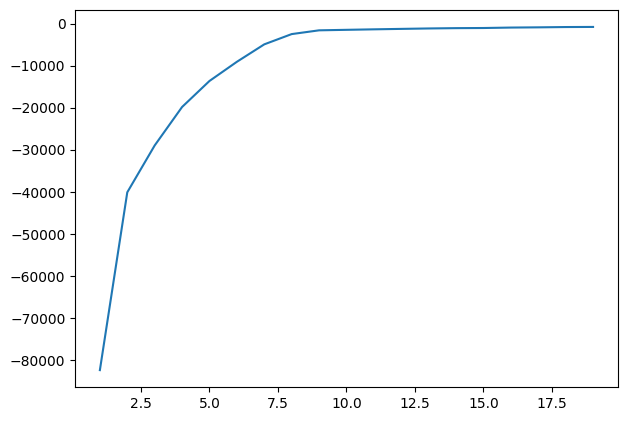

,0,1,cluster,principal_feature1,principal_feature2
0,0.010624,1.416368,4,0.010624,1.416368
1,-0.104163,1.344899,4,-0.104163,1.344899
2,-0.098503,1.276361,4,-0.098503,1.276361
3,0.020025,1.210569,4,0.020025,1.210569
4,-0.022053,1.140869,4,-0.022053,1.140869
...,...,...,...,...,...
7262,0.466114,0.187009,8,0.466114,0.187009
7263,0.192947,-0.839546,5,0.192947,-0.839546
7264,0.183136,-0.908461,1,0.183136,-0.908461
7265,0.180124,-0.977210,1,0.180124,-0.977210


In [21]:
# create an elbow plot to determine k (where the elbow occurs/line bends)
n_cluster = range(1, 20) 
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster] 
scores = [kmeans[i].score(data) for i in range(len(kmeans))] 
fig, ax = plt.subplots() 
ax.plot(n_cluster, scores) 
plt.show()
data

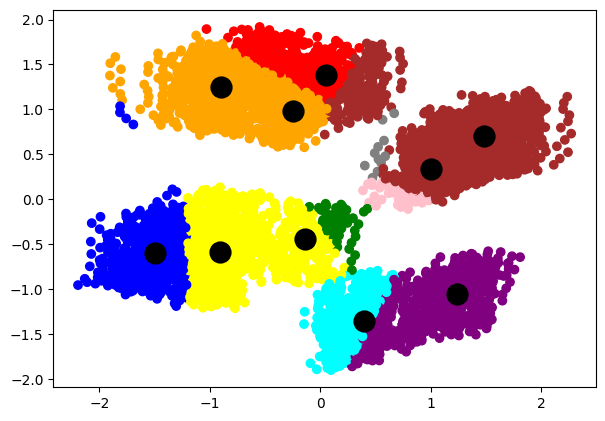

[[ 4.89699987e-02  1.38279460e+00  4.00000000e+00  4.89699987e-02
   1.38279460e+00]
 [-1.49151868e+00 -5.94470610e-01  3.00000000e+00 -1.49151868e+00
  -5.94470610e-01]
 [ 1.00450061e+00  3.37294123e-01  8.00000000e+00  1.00450061e+00
   3.37294123e-01]
 [ 3.98997342e-01 -1.35344206e+00  1.00000000e+00  3.98997342e-01
  -1.35344206e+00]
 [-8.99596568e-01  1.25082539e+00 -2.93098879e-14 -8.99596568e-01
   1.25082539e+00]
 [-9.10658677e-01 -5.88196151e-01  7.00000000e+00 -9.10658677e-01
  -5.88196151e-01]
 [ 1.48024536e+00  7.09374330e-01  2.00000000e+00  1.48024536e+00
   7.09374330e-01]
 [ 1.23566388e+00 -1.05489216e+00  6.00000000e+00  1.23566388e+00
  -1.05489216e+00]
 [-1.40586118e-01 -4.45800646e-01  5.00000000e+00 -1.40586118e-01
  -4.45800646e-01]
 [-2.41805164e-01  9.79955048e-01  4.00000000e+00 -2.41805164e-01
   9.79955048e-01]]


In [24]:
# predict clusters with your k
# k = however many clusters you determined from your elbow plot or silhouette method
data['cluster'] = kmeans[9].predict(data)
data['principal_feature1'] = data[0]
data['principal_feature2'] = data[1]
# plot the clusters and their respective amounts of data
data['cluster'].value_counts()
# plot the different clusters with the 2 main PCA features 
fig, ax = plt.subplots() 
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'grey', 5:'yellow', 6:'brown', 7:"purple", 8:'cyan', 9:'orange'} 
ax.scatter(data['principal_feature1'], data['principal_feature2'], c=data["cluster"].apply(lambda x: colors[x]))
centr = kmeans[9].cluster_centers_
plt.scatter(centr[:, 0], centr[:, 1], marker="o", s=169, linewidths=3, color="k")
#centr2d = pca.transform(centr)
plt.show()
print(centr)

In [23]:
фы

NameError: name 'фы' is not defined